## Bike Sharing Assignment

In [1]:
import os
current_directory = os.getcwd()
print(current_directory)

C:\Users\patha\Downloads


In [48]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#Reading the data
bike_share_data = pd.read_csv('day.csv')
bike_share_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [50]:
bike_share_data.shape

(730, 16)

In [51]:
summary = bike_share_data.info()
print("Summary Info:\n", summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
Summary Info:
 None


### I can see there are no Nulls in the dataset so we do not need to check for nUll values

In [52]:
#Check Count of Unique values for the dataset
bike_share_data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [53]:
#basic statistics
basic_stats = bike_share_data.describe()
print("\nBasic Statistics:\n", basic_stats)


Basic Statistics:
           instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std    

In [54]:
# Check for missing values
missing_values = bike_share_data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [55]:
#Checking unique values for categorical columns
print('Distinct Seasons')
print(bike_share_data['season'].unique())

print('Distinct month')
print(bike_share_data['mnth'].unique())

print('Distinct Year')
print(bike_share_data['yr'].unique())

print('Distinct weekday')
print(bike_share_data['weekday'].unique())

print('Distinct weathersit')
print(bike_share_data['weathersit'].unique())

print('Distinct workingday')
print(bike_share_data['workingday'].unique())

print('Distinct holiday')
print(bike_share_data['holiday'].unique())

Distinct Seasons
[1 2 3 4]
Distinct month
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Distinct Year
[0 1]
Distinct weekday
[6 0 1 2 3 4 5]
Distinct weathersit
[2 1 3]
Distinct workingday
[0 1]
Distinct holiday
[0 1]


In [56]:
# categorical and numerical columns

cat_col=['season','yr','holiday','mnth','weekday','workingday','weathersit']

num_cols=['temp','atemp','hum','windspeed','casual','registered','cnt']

other_col =['instant','dteday']

### Perform EDA on the columns

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


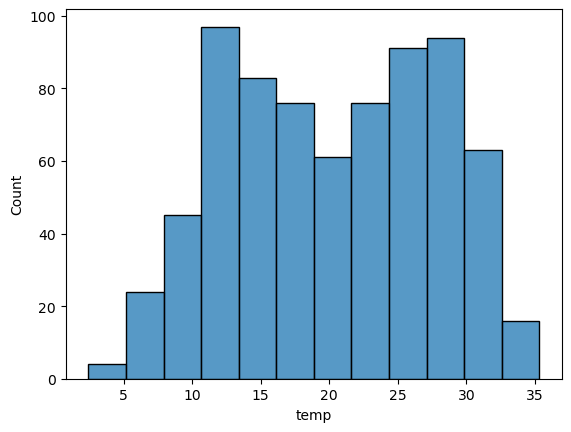

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


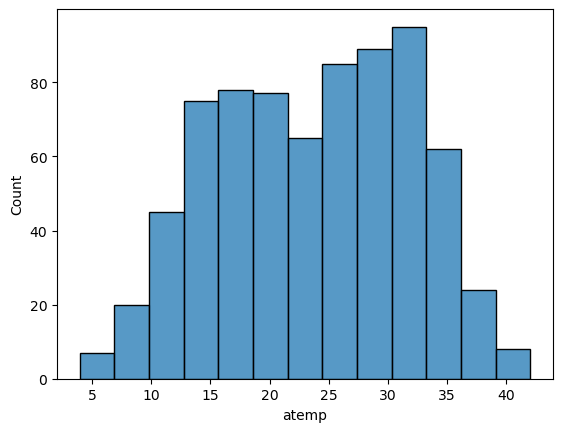

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


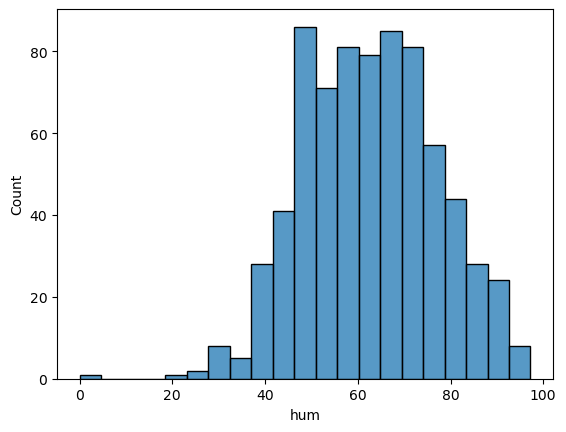

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


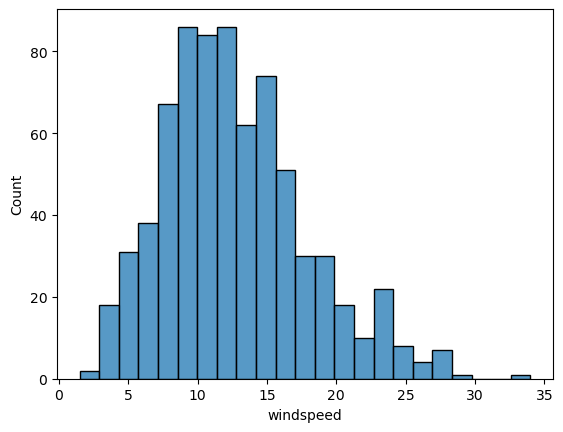

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


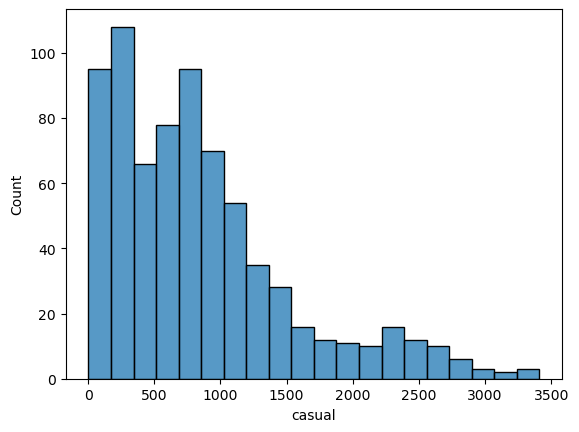

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


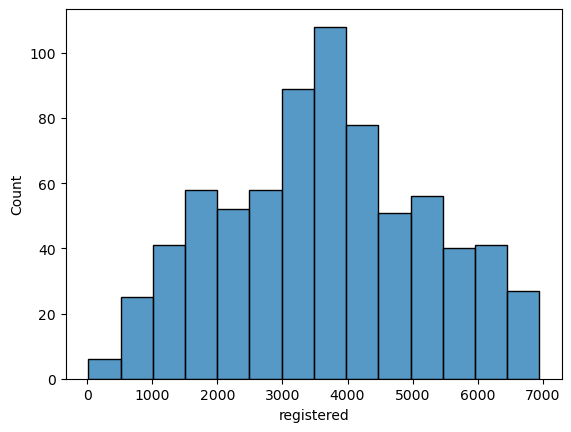

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


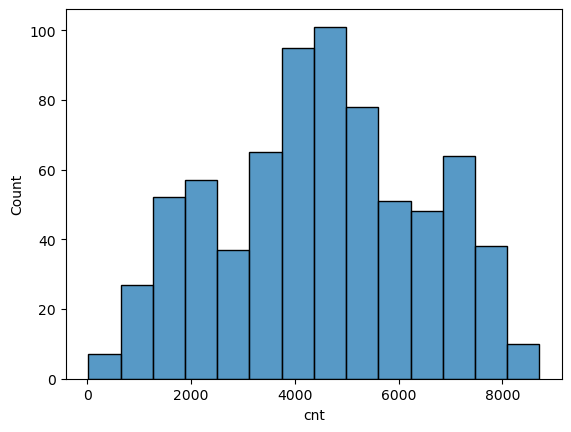

In [57]:
for i in num_cols:
    sns.histplot(x=bike_share_data[i])
    plt.show()

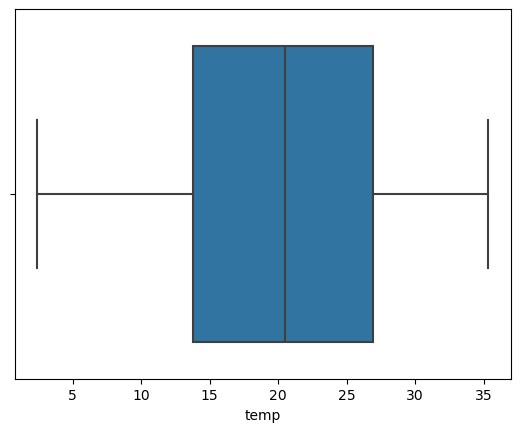

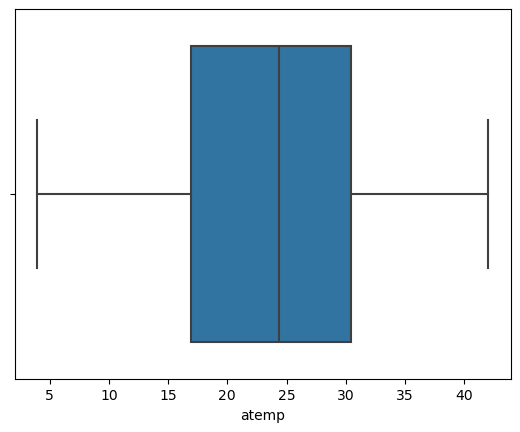

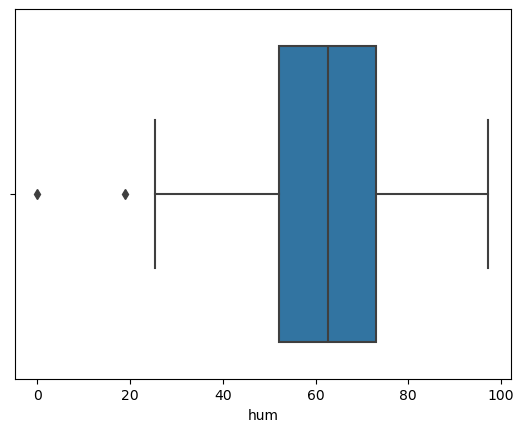

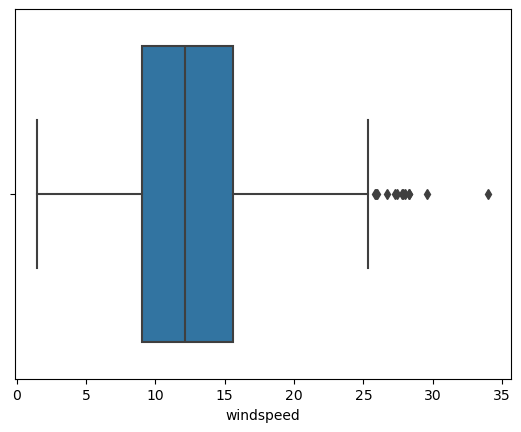

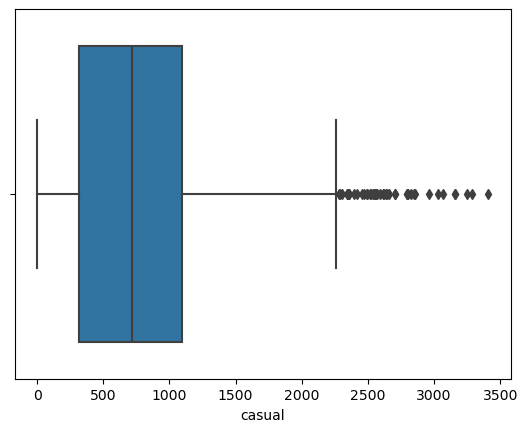

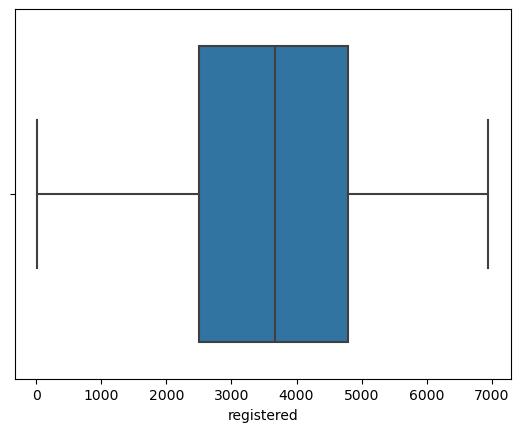

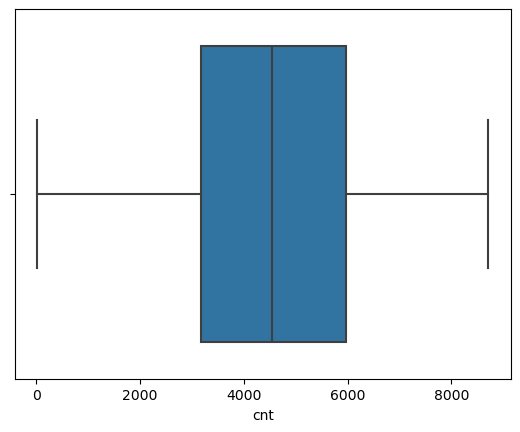

In [58]:
for i in num_cols:
    sns.boxplot(x=bike_share_data[i])
    plt.show()

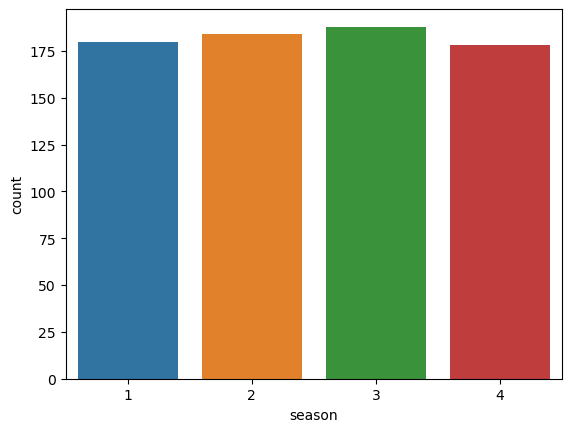

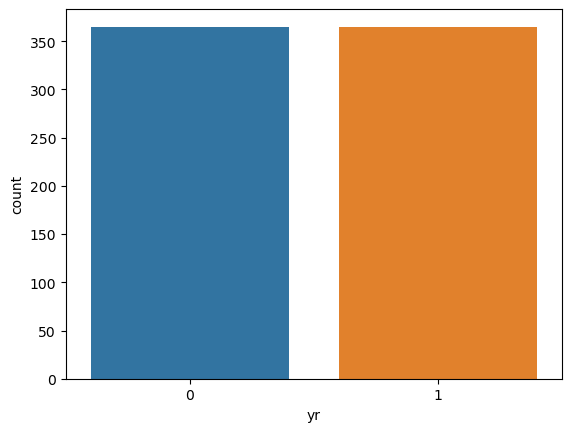

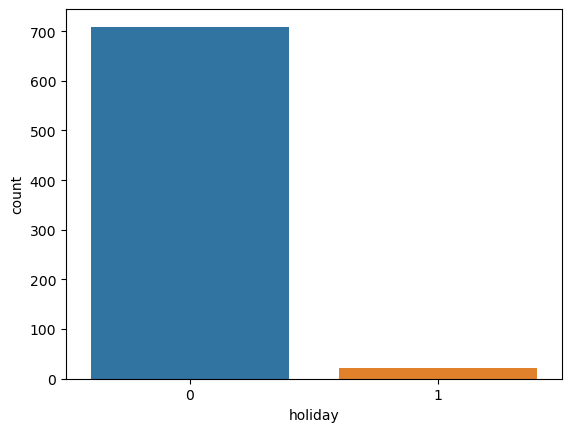

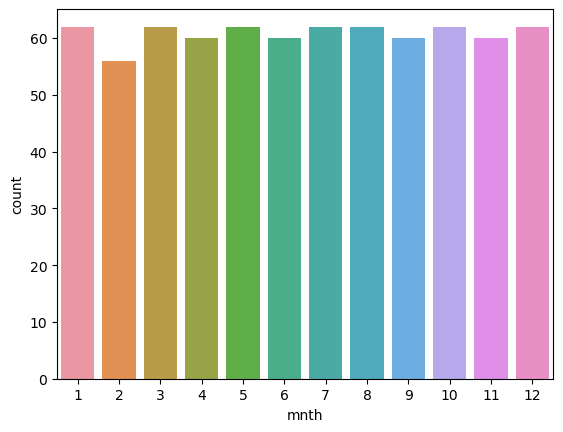

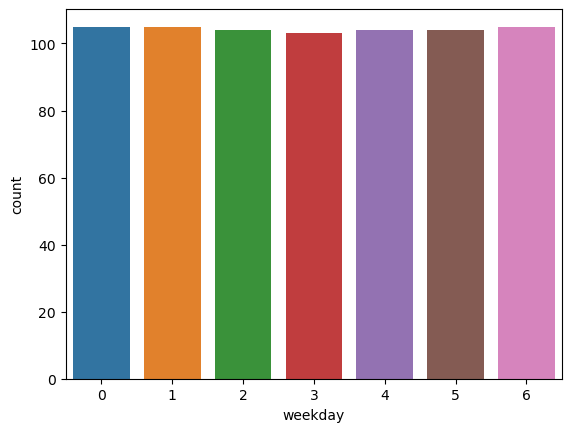

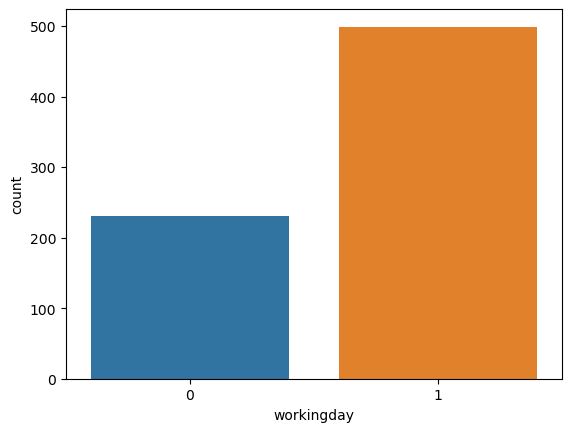

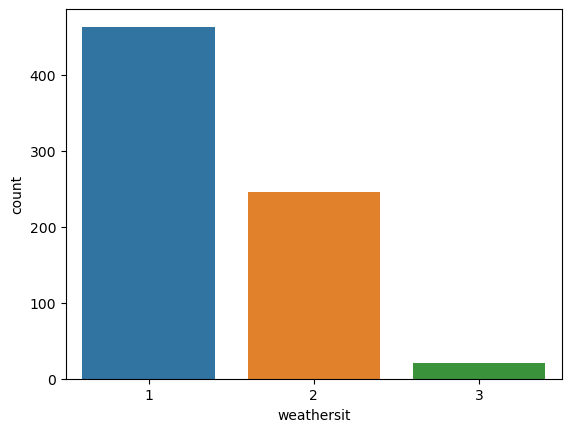

In [59]:
for i in cat_col:
    sns.countplot(x=bike_share_data[i])
    plt.show()

#### Bivariate Analysis

Bivariate analysis can be done to explore relationship between two variables. We can perform Bivariate in numerical vs numerical(Scatter plots, correlation coeficients) , categorical vs numerical(Box Plot) and categorical vs categorical (Cross Tabulation. staked bar plots)

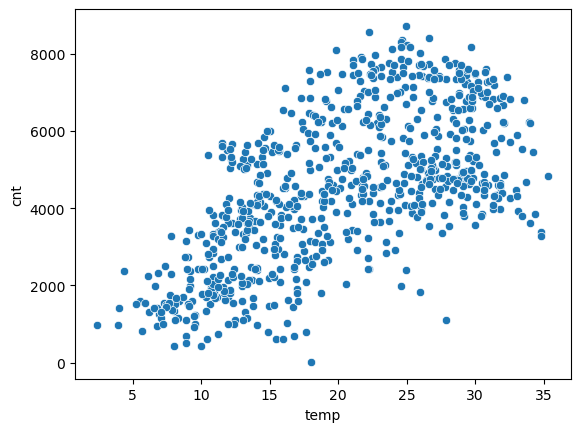

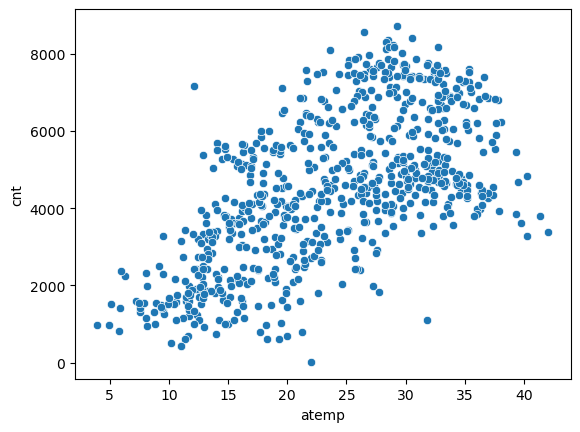

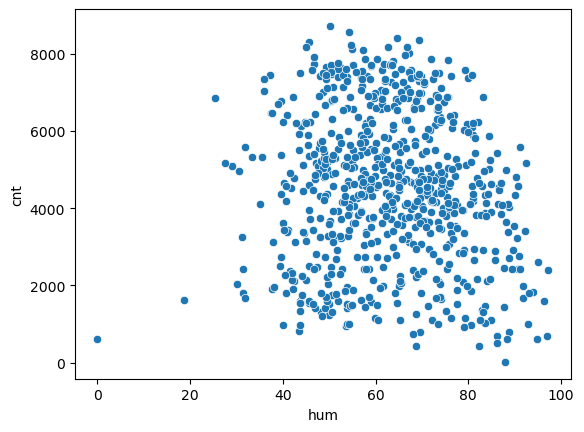

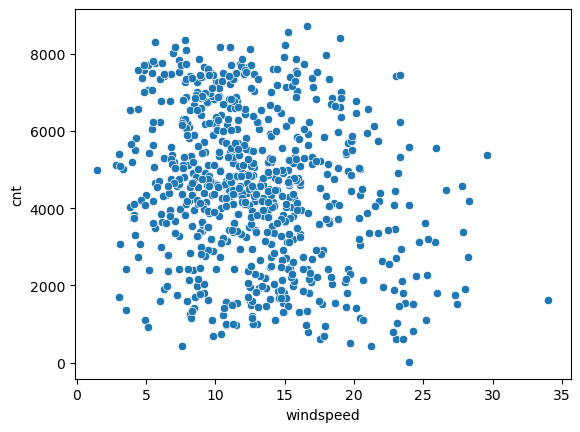

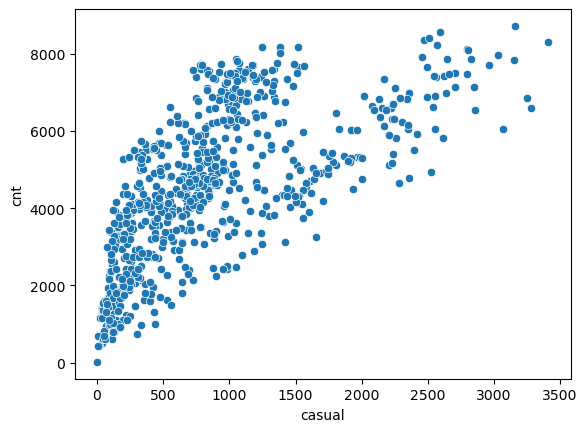

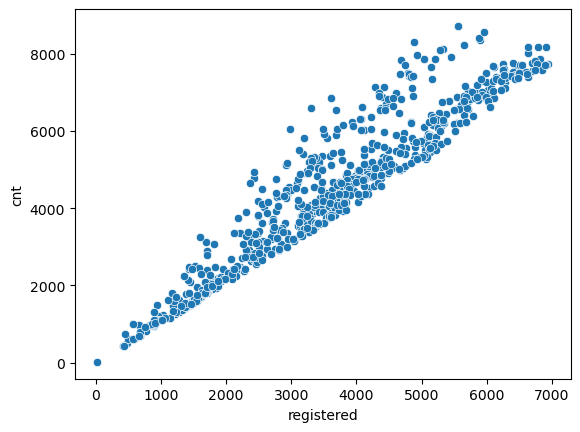

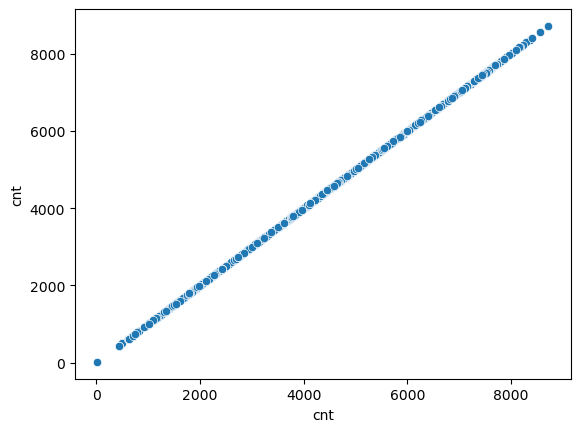

In [60]:
#Numerical vs Numerical 

for i in num_cols:
    sns.scatterplot(x=bike_share_data[i], y=bike_share_data['cnt'])
    plt.show()

It can be observeed that with temperature increase, Bike demand increases

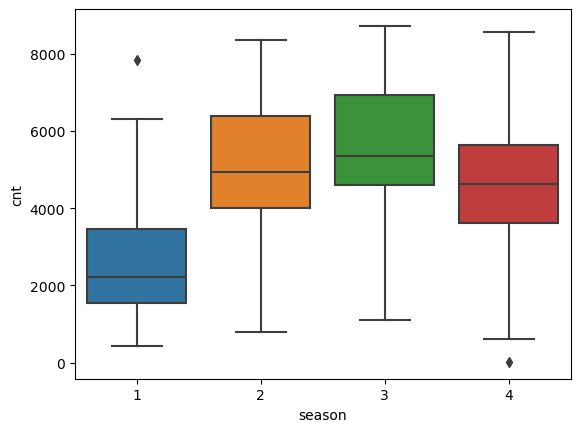

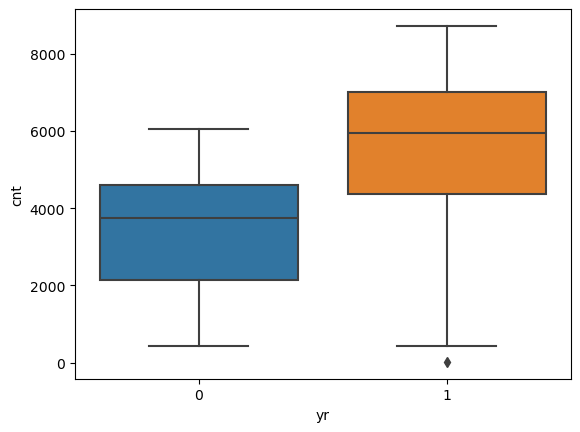

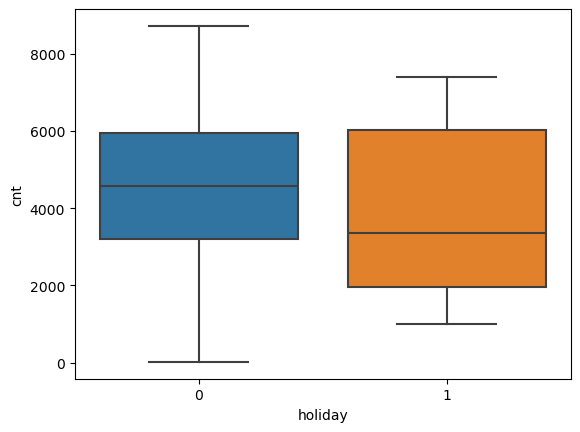

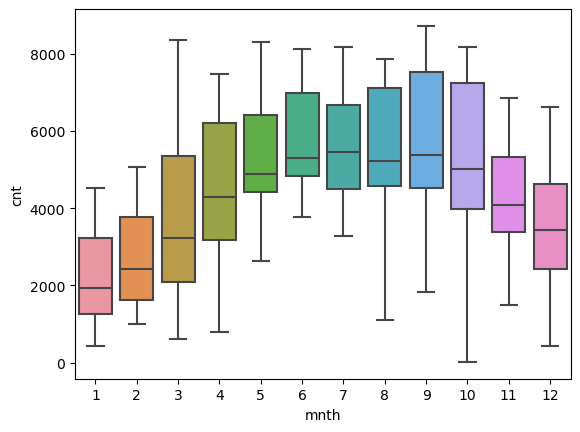

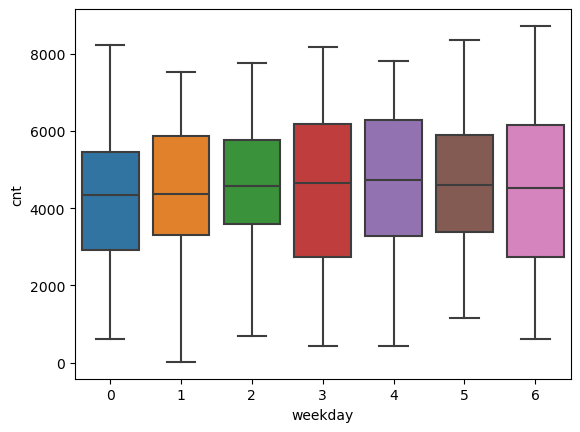

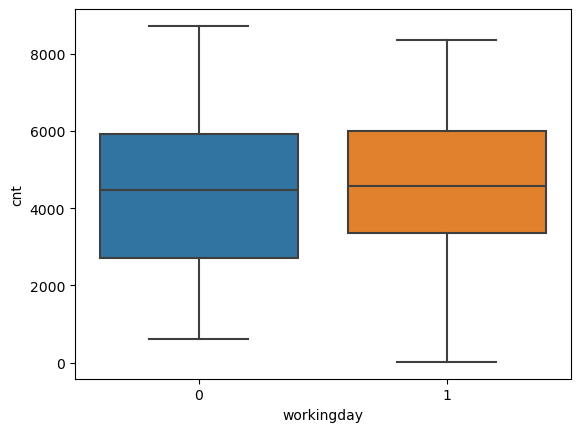

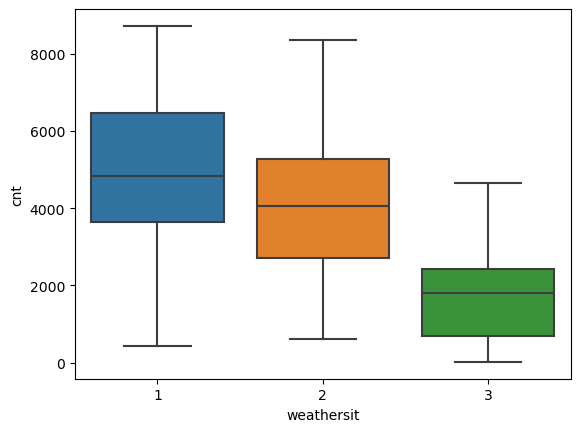

In [61]:
#Numerical vs Categorical

for i in cat_col:
    sns.boxplot(x=bike_share_data[i], y=bike_share_data['cnt'])
    plt.show()

### Multivariate Analysis

In [45]:
!pip install --upgrade matplotlib seaborn

  Using cached matplotlib-3.9.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached matplotlib-3.9.0-cp311-cp311-win_amd64.whl (8.0 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\patha\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



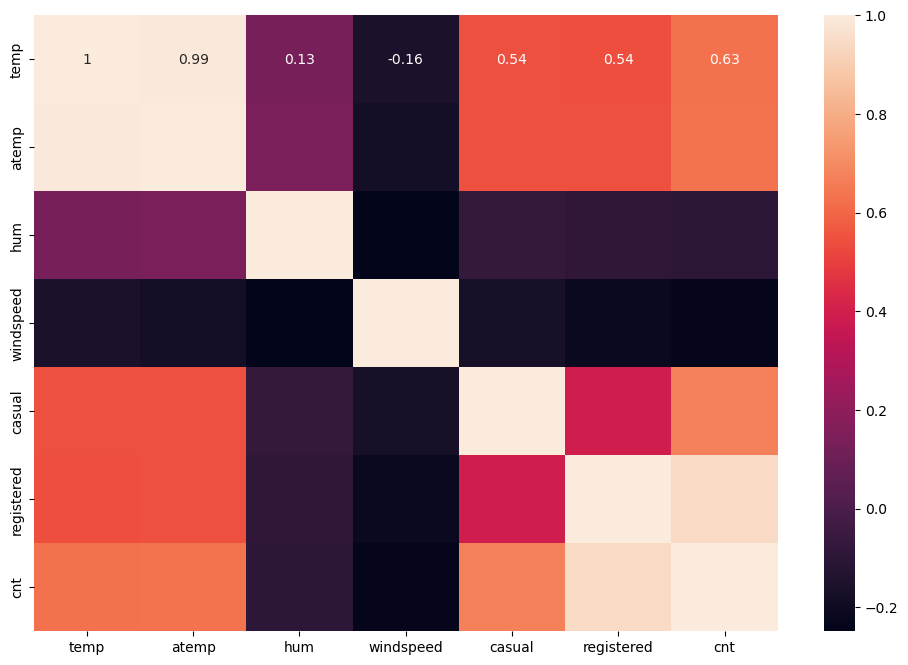

In [62]:
#Heatmap

'''Correlation is between -1 to 1 , where value 0 represents no relationship and near 1 or -1, the co-relation is significantly high, 
correlation between 0 and 1 is direct relationship and between -1 to 0  shows inverse relationship'''

plt.figure(figsize=(12,8))
sns.heatmap(bike_share_data[num_cols].corr(),annot=True)  #Annot is used to show values 
plt.show()

#### Above analysis concludes that data is fit for linear regression model 

#### Prepare the data for Modelling

In [63]:
bike_share_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [64]:
# Drop unused columns in modelling
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
bike_share_data_m=bike_share_data.drop(columns=columns_to_drop)

In [65]:
bike_share_data_m.shape

(730, 12)

In [66]:
bike_share_data_m.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [68]:
# Map categorical column values in numerical type to description

weather_map ={
    1: 'clear',
    2: 'cloudy',
    3: 'lightrain'
}

bike_share_data_m['weathersit']= bike_share_data_m['weathersit'].map(weather_map)

season_map ={
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'    
}

bike_share_data_m['season']=bike_share_data_m['season'].map(season_map)

month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

bike_share_data_m['mnth']= bike_share_data_m['mnth'].map(month_map)

weekday_map = {
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'
}

bike_share_data_m['weekday']= bike_share_data_m['weekday'].map(weekday_map)

In [69]:
bike_share_data_m.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Pre-processing
Create dummy variable

In [71]:
dumm1=pd.get_dummies(bike_share_data_m['weathersit'],drop_first=True,dtype=int)
dumm2=pd.get_dummies(bike_share_data_m['season'],drop_first=True,dtype=int)
dumm3=pd.get_dummies(bike_share_data_m['mnth'],drop_first=True,dtype=int)
dumm4=pd.get_dummies(bike_share_data_m['weekday'],drop_first=True,dtype=int)

In [72]:
bike_share_data_m=pd.concat([bike_share_data_m,dumm1],axis=1)
bike_share_data_m=pd.concat([bike_share_data_m,dumm2],axis=1)
bike_share_data_m=pd.concat([bike_share_data_m,dumm3],axis=1)
bike_share_data_m=pd.concat([bike_share_data_m,dumm4],axis=1)

In [73]:
bike_share_data_m.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sat,0,cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [74]:
columns_to_drop_1 = ['weathersit', 'season', 'mnth', 'weekday']
bike_share_data_m=bike_share_data_m.drop(columns=columns_to_drop_1)

In [75]:
bike_share_data_m.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cloudy,lightrain,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Train test Split

In [76]:
X=bike_share_data_m.drop(['cnt'],axis=1)
y=bike_share_data_m['cnt']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [78]:
X_train.head()
print(X_train.shape)
print(X_test.shape)

(584, 29)
(146, 29)


#### Scaling

In [79]:
X_train.columns=X_train.columns.astype(str)
X_test.columns=X_test.columns.astype(str)

In [80]:
from sklearn.preprocessing import MinMaxScaler
num1_cols = ['temp', 'hum', 'windspeed']
scaler = MinMaxScaler()
X_train[num1_cols] = scaler.fit_transform(X_train[num1_cols])
X_test[num1_cols] = scaler.transform(X_test[num1_cols])

In [81]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [82]:
X_train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cloudy,lightrain,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
367,1,0,1,0.113228,6.31375,0.454701,0.695175,0,0,1,...,0,0,0,0,0,0,0,0,1,0
648,1,0,1,0.468352,21.55835,0.477458,0.299450,0,0,0,...,0,0,1,0,0,0,0,1,0,0
44,0,0,1,0.443431,19.91750,0.387290,0.807474,0,0,1,...,0,0,0,0,1,0,0,0,0,0
705,1,0,1,0.326094,16.09790,0.787463,0.189819,1,0,0,...,0,0,0,0,0,0,0,0,0,0
379,1,0,0,0.133996,8.08125,0.431945,0.449210,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#### Feature Selection

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [84]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

In [85]:
selector=selector.fit(X_train_df,y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False])

In [86]:
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cloudy',
       'lightrain', 'summer', 'winter', 'Aug', 'Jan', 'Nov', 'Sep', 'Sat'],
      dtype='object')


In [87]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

#### Modelling

In [88]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [89]:
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     218.5
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.30e-224
Time:                        20:57:35   Log-Likelihood:                -4696.4
No. Observations:                 584   AIC:                             9425.
Df Residuals:                     568   BIC:                             9495.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1681.8330    238.757      7.044      0.000    1212.879    2150.787
yr          1961.7606     64.092     30.609      0.000    1835.875    2087.647
holiday     -470.5165    208.982     -2.251      0.025    -880.988     -60.045
workingday   439.3828     89.607      4.903      0.000     263.381     615.385
temp        4646.3756    193.095     24.063      0.000    4267.107    5025.644
hum        -1420.6224    303.269     -4.684      0.000   -2016.288    -824.957
windspeed  -1599.8184    204.693     -7.816      0.000   -2001.867   -1197.770
cloudy      -485.8323     83.972     -5.786      0.000    -650.765    -320.899
lightrain  -2177.6777    215.720    -10.095      0.000   -2601.385   -1753.971
summer       868.5339     89.083      9.750      0.000     693.562    1043.505
winter      1338.8882     99.404     13.469      0.000    1143.645    1534.132
Aug          434.3951    131.319      3.308      0.001     176.465     692.325
Jan         -285.0049    137.070     -2.079      0.038    -554.231     -15.779
Nov         -243.1629    137.831     -1.764      0.078    -513.883      27.557
Sep          943.7771    127.850      7.382      0.000     692.660    1194.894
Sat          518.5417    114.907      4.513      0.000     292.847     744.236
==============================================================================
Omnibus:                       78.377   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.966
Skew:                          -0.720   Prob(JB):                     1.86e-40
Kurtosis:                       5.333   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p value should is < 0.05 and VIF is < 5

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,57.245544
1,yr,1.030504
2,holiday,1.168662
3,workingday,1.788785
4,temp,1.897972
5,hum,1.917715
6,windspeed,1.187141
7,cloudy,1.594527
8,lightrain,1.245245
9,summer,1.480489


In [94]:
## p value is looking in limit for all features

#### Make Predictions on the Test Set

In [95]:
# Predict on the test set
y_test_pred = res2.predict(X_test_sm)

In [96]:
y_test_pred

184    3521.662019
535    8026.835335
299    3628.325256
221    5487.772872
152    5480.717058
          ...     
219    5260.104177
719    3189.038837
3      1381.627263
392    3988.330986
360    1555.780367
Length: 146, dtype: float64

In [97]:
# Calculate residuals
residuals = y_test - y_test_pred

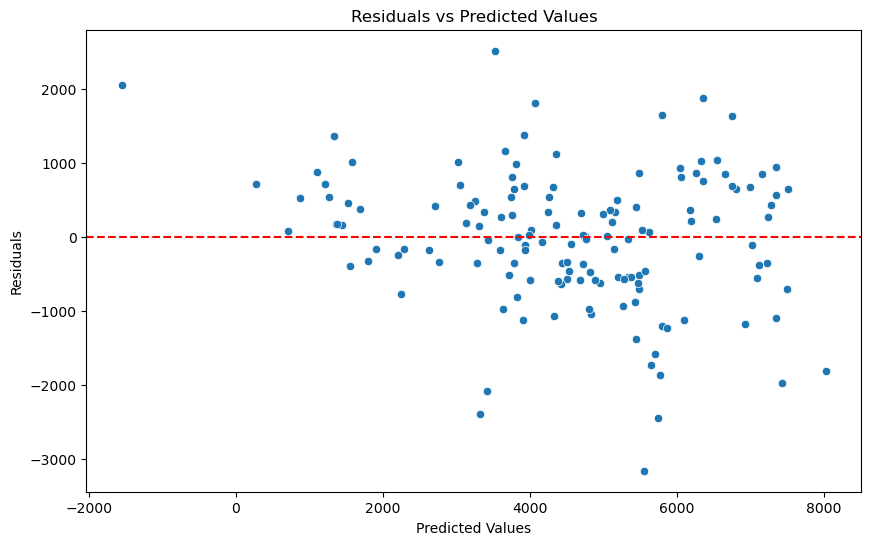

In [98]:
# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


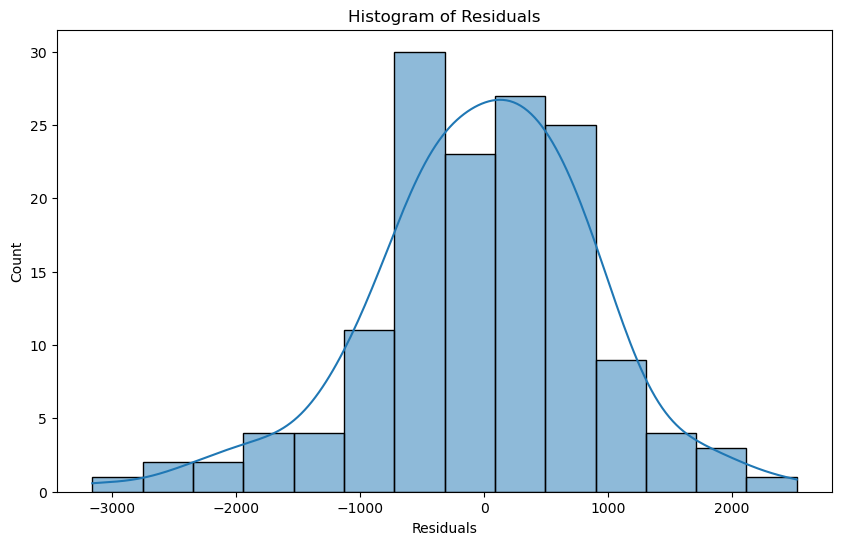

In [99]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

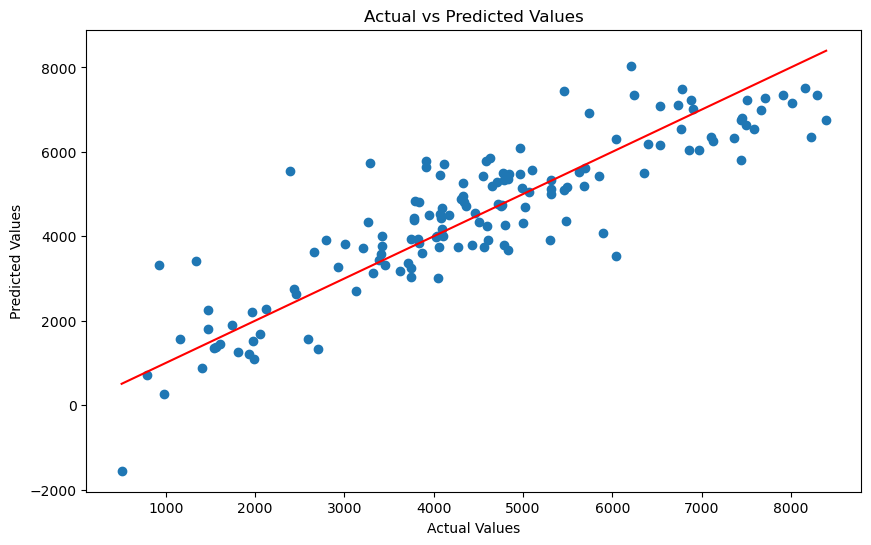

In [100]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

#### Second model

In [101]:
estimator=LinearRegression()
selector2=RFE(estimator,n_features_to_select=20)

In [102]:
selector2=selector2.fit(X_train_df,y_train)
selector2.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False,  True, False,  True,  True, False,
       False, False])

In [103]:
selected_features2=X_train_df.columns[selector2.support_]
print(selected_features2)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cloudy',
       'lightrain', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'May', 'Nov', 'Sep', 'Sat', 'Sun'],
      dtype='object')


In [104]:
X_train2=X_train_df[selected_features2]
X_test2=X_test_df[selected_features2]

In [107]:
import statsmodels.api as sm
X_train_sm2=sm.add_constant(X_train2)#X_train_sm["const"]=1
X_test_sm2=sm.add_constant(X_test2)

In [108]:
model2=sm.OLS(np.array(y_train),X_train_sm2)
lr1=model2.fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     176.9
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          4.30e-223
Time:                        21:15:12   Log-Likelihood:                -4688.4
No. Observations:                 584   AIC:                             9417.
Df Residuals:                     564   BIC:                             9504.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1963.1728    248.400      7.903      0.000    1475.271    2451.074
yr          1985.4656     63.794     31.123      0.000    1860.163    2110.768
holiday      -59.4286    168.959     -0.352      0.725    -391.293     272.436
workingday   795.2783     80.787      9.844      0.000     636.598     953.959
temp        3864.2826    302.652     12.768      0.000    3269.821    4458.744
hum        -1274.5452    307.345     -4.147      0.000   -1878.225    -670.865
windspeed  -1595.6938    204.251     -7.812      0.000   -1996.879   -1194.508
cloudy      -510.7734     83.533     -6.115      0.000    -674.847    -346.700
lightrain  -2266.7388    215.670    -10.510      0.000   -2690.354   -1843.124
spring      -289.5267    184.600     -1.568      0.117    -652.114      73.061
summer       555.4428    144.332      3.848      0.000     271.948     838.937
winter      1166.2871    146.610      7.955      0.000     878.319    1454.255
Aug          322.7699    140.222      2.302      0.022      47.348     598.191
Dec         -502.3362    143.067     -3.511      0.000    -783.345    -221.327
Feb         -297.1286    166.460     -1.785      0.075    -624.086      29.829
Jan         -561.7456    169.890     -3.307      0.001    -895.440    -228.051
May          129.9071    137.062      0.948      0.344    -139.308     399.122
Nov         -502.3158    151.542     -3.315      0.001    -799.972    -204.660
Sep          787.5607    136.683      5.762      0.000     519.091    1056.030
Sat          877.2548     96.467      9.094      0.000     687.777    1066.732
Sun          350.0683     96.989      3.609      0.000     159.565     540.571
==============================================================================
Omnibus:                      103.735   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.310
Skew:                          -0.868   Prob(JB):                     3.35e-64
Kurtosis:                       5.999   Cond. No.                     1.94e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [117]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]
vif_data

,Feature,VIF
0,const,65.276058
1,yr,1.034621
2,temp,2.989155
3,hum,1.986801
4,windspeed,1.191271
5,cloudy,1.596231
6,lightrain,1.256699
7,summer,2.301136
8,winter,2.207691
9,Aug,1.456007


In [118]:
#Dropping "spring", "holiday", "workingday", "Sat", "Sun" since high VIF and inf output
X_train_sm2=X_train_sm2.drop(["spring", "holiday", "workingday", "Sat", "Sun"],axis=1)
X_test_sm2=X_test_sm2.drop(["spring", "holiday", "workingday", "Sat", "Sun"],axis=1)

KeyError: "['spring', 'holiday', 'workingday', 'Sat', 'Sun'] not found in axis"

In [119]:
model_new=sm.OLS(np.array(y_train),X_train_sm2)
lr2=model_new.fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.03e-217
Time:                        21:26:07   Log-Likelihood:                -4712.2
No. Observations:                 584   AIC:                             9456.
Df Residuals:                     568   BIC:                             9526.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2450.2850    261.952      9.354      0.000    1935.772    2964.798
yr          1972.9170     65.982     29.901      0.000    1843.318    2102.516
temp        4159.6292    248.978     16.707      0.000    3670.599    4648.659
hum        -1409.8197    317.156     -4.445      0.000   -2032.761    -786.878
windspeed  -1623.2777    210.677     -7.705      0.000   -2037.079   -1209.476
cloudy      -462.1018     86.323     -5.353      0.000    -631.652    -292.551
lightrain  -2137.8264    222.658     -9.601      0.000   -2575.161   -1700.492
summer       709.3148    114.109      6.216      0.000     485.187     933.443
winter      1344.6273    111.253     12.086      0.000    1126.109    1563.146
Aug          435.2145    136.193      3.196      0.001     167.711     702.718
Dec         -506.1062    148.017     -3.419      0.001    -796.833    -215.379
Feb         -400.8242    166.925     -2.401      0.017    -728.689     -72.959
Jan         -634.8988    173.792     -3.653      0.000    -976.252    -293.545
May          124.9681    141.002      0.886      0.376    -151.982     401.918
Nov         -543.3596    153.928     -3.530      0.000    -845.698    -241.021
Sep          851.7392    134.242      6.345      0.000     588.068    1115.411
==============================================================================
Omnibus:                      101.478   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.296
Skew:                          -0.880   Prob(JB):                     1.82e-57
Kurtosis:                       5.764   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]
vif_data

,Feature,VIF
0,const,65.276058
1,yr,1.034621
2,temp,2.989155
3,hum,1.986801
4,windspeed,1.191271
5,cloudy,1.596231
6,lightrain,1.256699
7,summer,2.301136
8,winter,2.207691
9,Aug,1.456007


#### Prediction For the second Model

In [121]:
# Predict on the test set
y_test_pred2 = lr2.predict(X_test_sm2)

In [122]:
y_test_pred2

184    4384.619070
535    7772.095651
299    3738.876592
221    5385.289324
152    5243.563656
          ...     
219    5160.908561
719    2874.074235
3      1275.985779
392    3741.360286
360    1242.338883
Length: 146, dtype: float64

In [123]:
# Calculate residuals
residuals_new = y_test - y_test_pred2

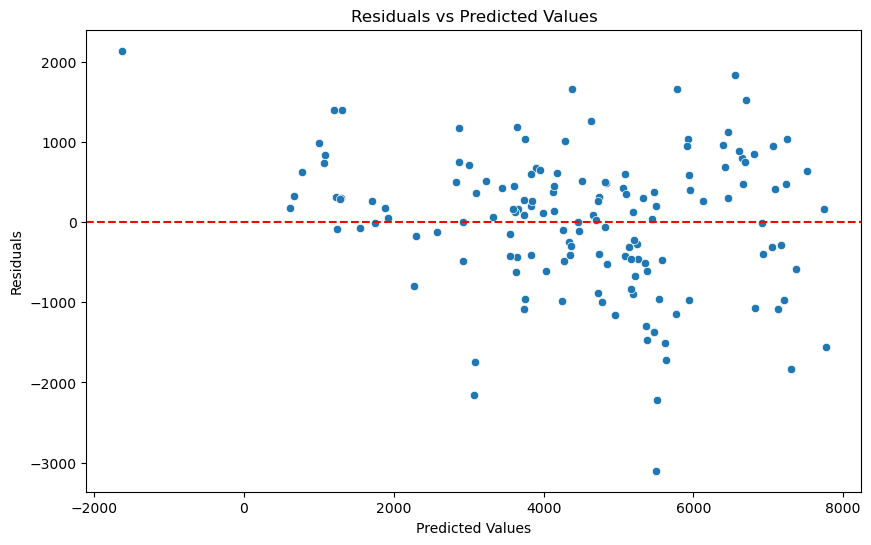

In [124]:
# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred2, y=residuals_new)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


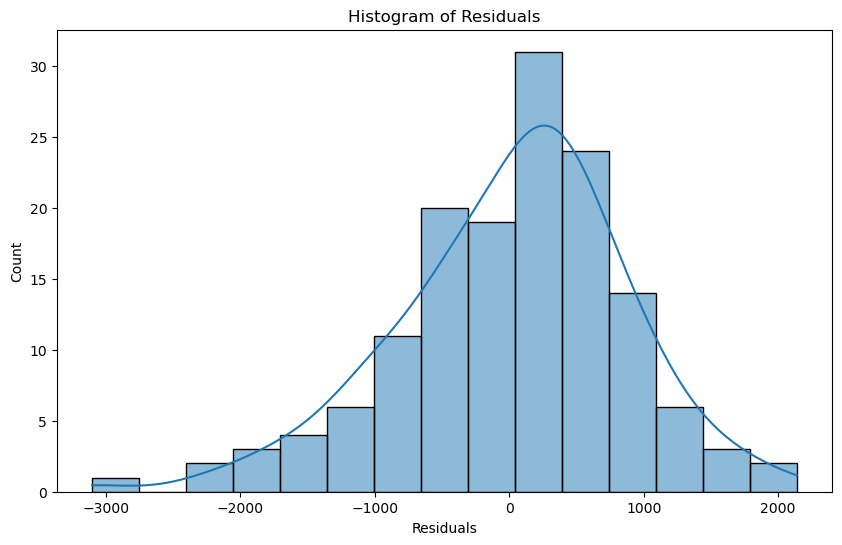

In [125]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_new, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

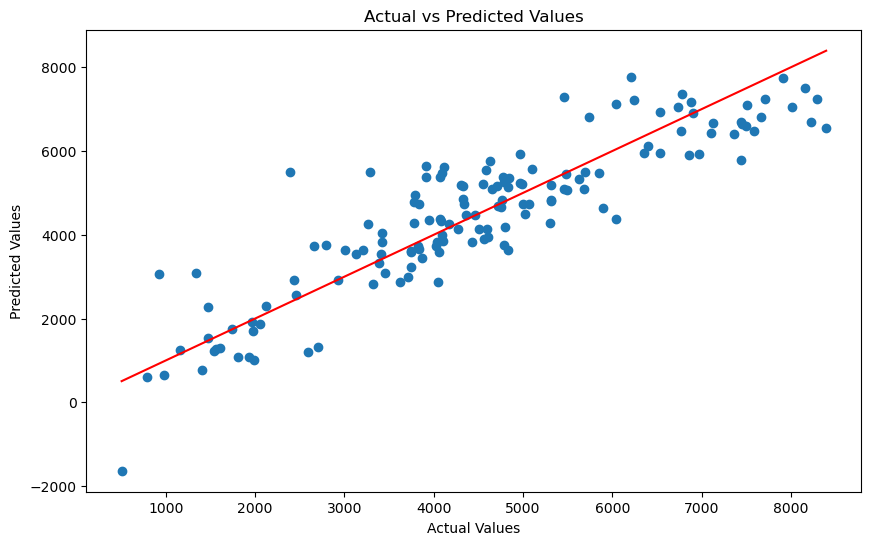

In [126]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Test on Train Data

In [127]:
y_train_pred = res2.predict(X_train_sm)

In [128]:
# Calculate residuals for the training set
residuals_train = y_train - y_train_pred

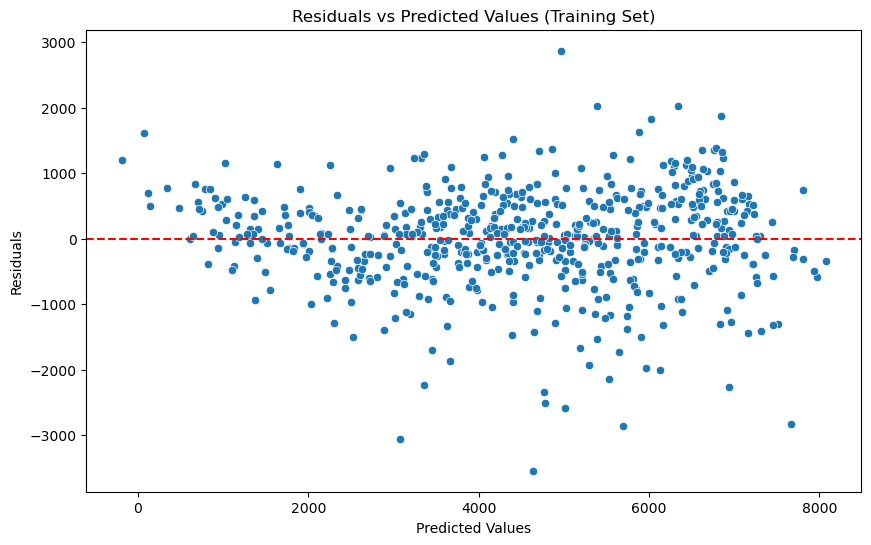

In [129]:
# Plot residuals for the training set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


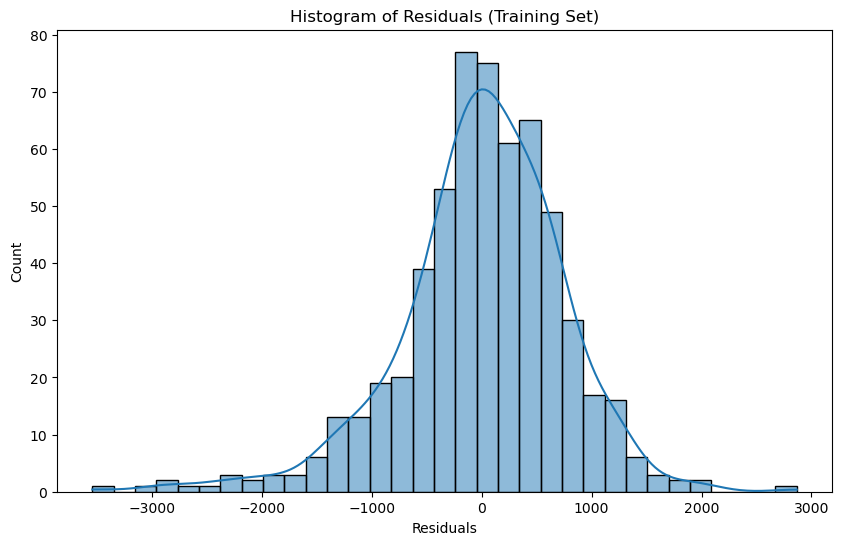

In [130]:
# Plot histogram of residuals for the training set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (Training Set)')
plt.show()

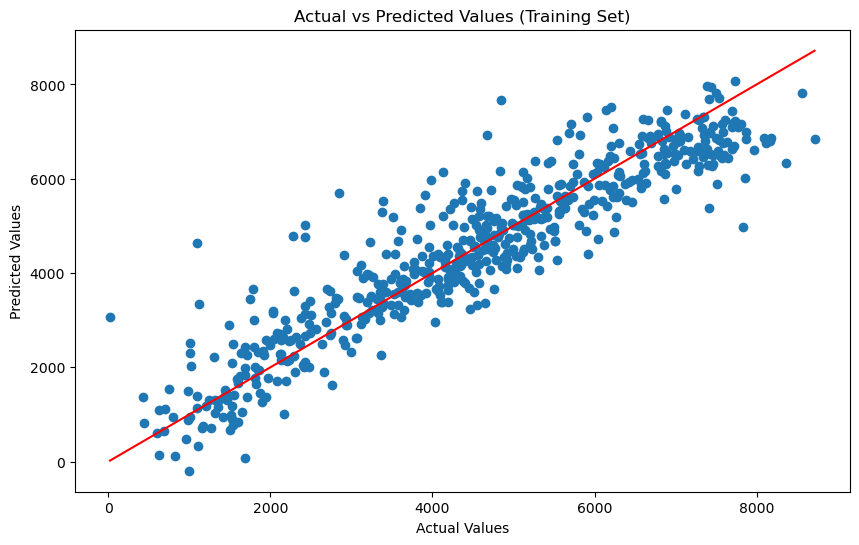

In [131]:
# Plot actual vs predicted values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.show()